In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib
import os 
%matplotlib inline

In [66]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000'

In [67]:
df = pd.read_csv('weatherAUS.csv')

In [68]:
df.dropna(subset=['RainTomorrow'],inplace=True)

<Axes: title={'center': 'No. of rows per year'}, xlabel='Date', ylabel='count'>

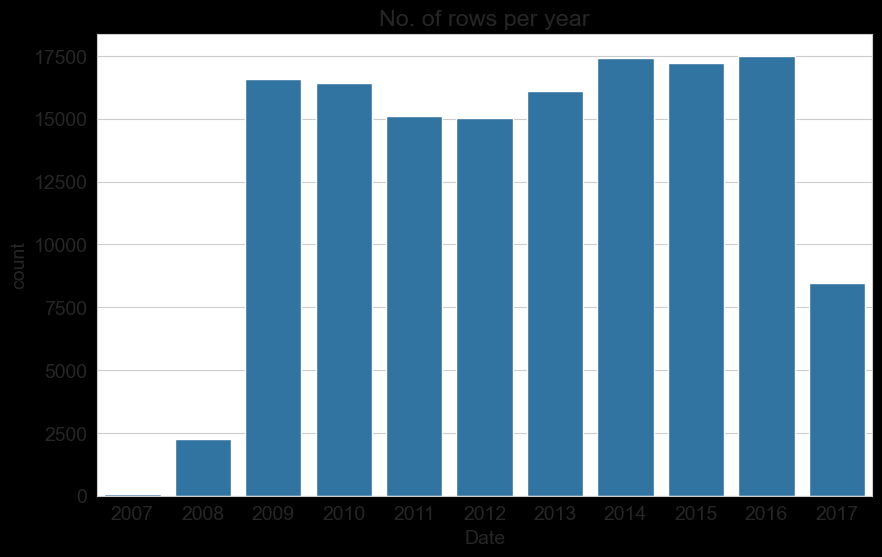

In [69]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(df['Date']).dt.year)

In [70]:
df['year'] = pd.to_datetime(df['Date']).dt.year
train_df = df[df['year']<2015]
val_df = df[df['year']==2015]
test_df = df[df['year']>2015]

In [71]:
input_cols =list(train_df.columns)[1:-2]
target_col = 'RainTomorrow'

In [72]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_target = val_df[target_col]

test_inputs = test_df[input_cols]
test_target = test_df[target_col]

In [73]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs .select_dtypes('object').columns.tolist()

In [74]:
from sklearn.impute import SimpleImputer

In [75]:
imputer = SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [76]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


C:\Users\danie\AppData\Local\Temp\ipykernel_19612\1868297225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_19612\1868297225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_19612\1868297225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [77]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[categorical_cols])

In [95]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [97]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [99]:
x_train = train_inputs[numeric_cols+encoded_cols]
x_val = val_inputs[numeric_cols+encoded_cols]
x_test = test_inputs[numeric_cols+encoded_cols]

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
model = DecisionTreeClassifier(random_state=69)

In [106]:
model.fit(x_train,train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,69
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [107]:
train_preds= model.predict(x_train)

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
pd.value_counts(train_preds)

C:\Users\danie\AppData\Local\Temp\ipykernel_19612\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76718
Yes    22270
Name: count, dtype: int64

In [117]:
train_probs = model.predict_proba(x_train)

In [118]:
accuracy_score(train_preds,train_targets)

0.9998484664807855

In [119]:
model.score(x_val,val_target)

0.7613603389240323